<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/20_2_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN은 순서가 있는 데이터셋에 활용가능합니다.
주가 데이터로 연습해봅시다

https://www.tensorflow.org/guide/keras/rnn

pandas-datareader 패키지를 통해 다양한 금융/경제 데이터를 얻을 수 있습니다

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-naver


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2010-01-01', end='2020-12-31')

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044


In [4]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [5]:
import pandas as pd

df = df.apply(pd.to_numeric)

In [6]:
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

<AxesSubplot:xlabel='Date'>

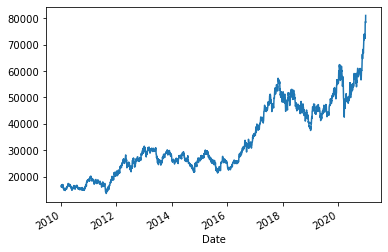

In [7]:
df.Close.plot()

In [8]:
TEST_SIZE = 300

train = df.Close[:-TEST_SIZE]
test = df.Close[-TEST_SIZE:]

In [9]:
import numpy as np

window_size = 20

inputs = []
targets = []

for i in range(len(train) - window_size):
    inputs.append(np.array(train[i:i+window_size]))
    targets.append(np.array(train[i+window_size]))

In [10]:
inputs[0]

array([16180, 16440, 16820, 16260, 16420, 15940, 16180, 15940, 16540,
       16840, 16860, 16460, 16680, 17000, 16500, 16840, 16300, 16000,
       16160, 15680], dtype=int64)

In [11]:
targets[0]

array(15540, dtype=int64)

In [12]:
inputs = np.array(inputs)
targets = np.array(targets)

In [13]:
print(inputs.shape)
print(targets.shape)

(2394, 20)
(2394,)


In [14]:
window_size = 20

test_inputs = []
test_targets = []

for i in range(len(test) - window_size):
    test_inputs.append(np.array(test[i:i+window_size]))
    test_targets.append(np.array(test[i+window_size]))

test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [15]:
test_inputs = np.expand_dims(test_inputs,2)

In [16]:
test_inputs.shape

(280, 20, 1)

In [17]:
inputs = np.expand_dims(inputs,2)
targets = np.expand_dims(targets,1)
test_targets = np.expand_dims(test_targets,1)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(20, 
               input_shape=(20,1), 
               activation='relu', 
               return_sequences=False)
          )

model.add(layers.Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(inputs,
                    targets,
                    epochs=50,
                    batch_size=16,
                    validation_data=(test_inputs, test_targets))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
146/150 [============================>.] - ETA: 0s - loss: 27632674.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001AE262B5168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

In [21]:
pred = model.predict(test_inputs)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


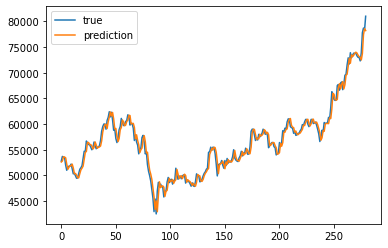

In [22]:
import matplotlib.pyplot as plt

plt.plot(test_targets, label = 'true')
plt.plot(pred, label = 'prediction')
plt.legend()

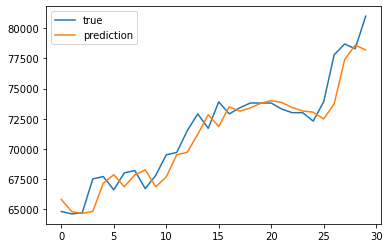

In [23]:
plt.plot(test_targets[-30:], label = 'true')
plt.plot(pred[-30:], label = 'prediction')
plt.legend()

단순히 Lagging되는 효과이며, 예측이라고 하기 어렵다. 
따라서 사용에 주의가 필요함